# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using contains 15,000 rows and 10 columns for the variables listed below.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understanding variables
- Cleaning dataset if any (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
print(df0.info())
print('Shape:', df0.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
Shape: (14999, 10)


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
columns = {'average_montly_hours':'avg_hours','time_spend_company':'Tenure','promotion_last_5years':'Promoted','number_project':'Projects'}
df0 = df0.rename(columns=columns)


# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'Projects', 'avg_hours',
       'Tenure', 'Work_accident', 'left', 'Promoted', 'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
df0.isna().sum()


satisfaction_level    0
last_evaluation       0
Projects              0
avg_hours             0
Tenure                0
Work_accident         0
left                  0
Promoted              0
Department            0
salary                0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
duplicates = df0.duplicated()
duplicates.sum()

3008

In [ ]:
# Inspect some rows containing duplicates as needed
df0[duplicates].head()


,satisfaction_level,last_evaluation,Projects,avg_hours,Tenure,Work_accident,left,Promoted,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.head()


,satisfaction_level,last_evaluation,Projects,avg_hours,Tenure,Work_accident,left,Promoted,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

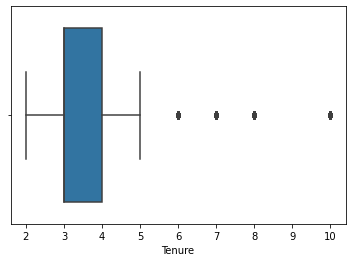

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df['Tenure'])


In [ ]:
# Determine the number of rows containing outliers
q3 = df['Tenure'].quantile(0.75)
q1 = df['Tenure'].quantile(0.25)
IQR = q3-q1
upp_lmt = q3+1.5*IQR
lwr_lmt = q1-1.5*IQR
mask = (df['Tenure'] > upp_lmt) | (df['Tenure'] < lwr_lmt)
df[mask].shape



(824, 10)

In [ ]:
(df['satisfaction_level'] >= 0.61 ).sum()

6941

In [ ]:
6941/11991*100

57.88508047702443

In [ ]:
df.groupby('salary')['Promoted'].sum()

salary
high       44
low        38
medium    121
Name: Promoted, dtype: int64

In [ ]:
df.groupby(['Tenure'])[['left','Promoted']].sum()

,left,Promoted
Tenure,,
2,31,39
3,874,89
4,495,22
5,482,11
6,109,11
7,0,18
8,0,5
10,0,8


**Insights from step 1**
1. There were 10 features each with 14999 rows with no missing values but there
were so many duplicated records.
2. There were 57.8% of employees were rated above mean satisfaction level of all employees, 44 members with high salary got promoted and 121 with medium salary and 38 employees with low salary got promoted.
3. Total of Approx 2% employees only got promoted.
4. Most of the employees who left are, those tenure period is between 2-6 years no employee whose tenure is greater than 6 years weren't left the company.










## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
df['left'].value_counts()

# Get percentages of people who left vs. stayed
(df['left'] == 1).value_counts()/df.shape[0]*100

False    83.39588
True     16.60412
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Categorical Plot of Employees Left')

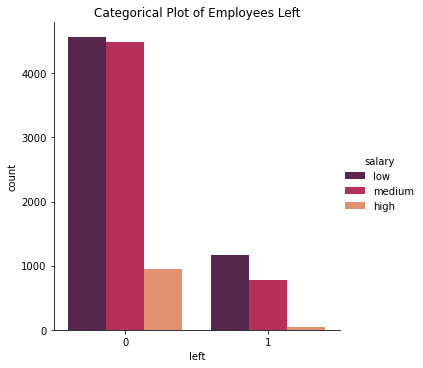

In [ ]:
# Create a plot as needed
sns.catplot(data=df,x='left', hue='salary', kind='count', palette='rocket')
plt.title('Categorical Plot of Employees Left')

Text(0.5, 1.0, 'Count plot of Employees Promoted/Number of persons left')

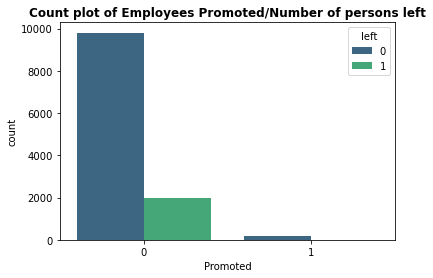

In [ ]:
# Create a plot as needed
sns.countplot(x='Promoted', data=df, hue = 'left', palette='viridis')
plt.title('Count plot of Employees Promoted/Number of persons left', fontsize=12, fontweight='bold')

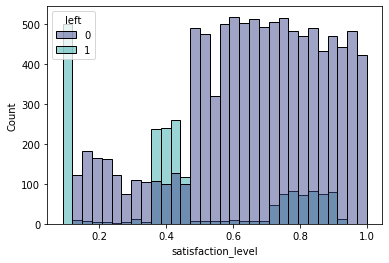

In [ ]:
# Create a plot as needed
sns.histplot(data=df, x='satisfaction_level', hue='left', palette='mako')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 720x576 with 0 Axes>

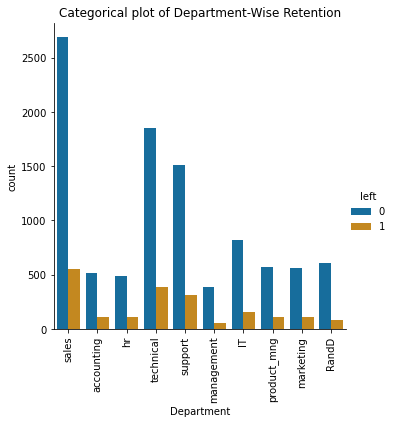

In [ ]:
# Create a plot as needed
plt.figure(figsize=(10,8))
sns.catplot(x='Department', data=df, hue='left', kind='count', palette='colorblind')
plt.title('Categorical plot of Department-Wise Retention')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Average Monthly Hours by Tenure and Retention')

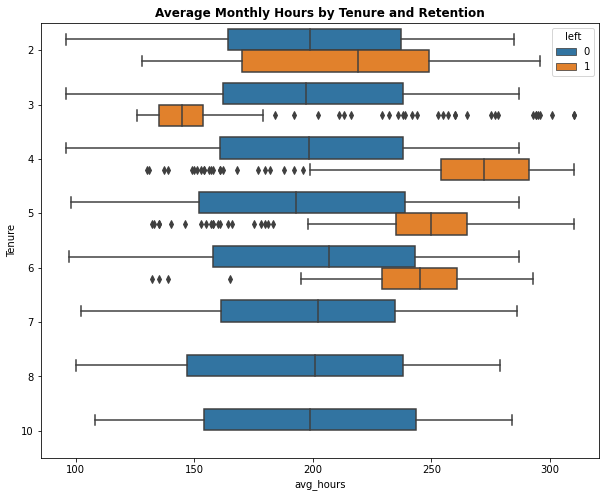

In [ ]:
# Create a plot as needed
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='avg_hours',y='Tenure', hue='left', orient='h')
plt.title('Average Monthly Hours by Tenure and Retention', fontsize=12, fontweight='bold')

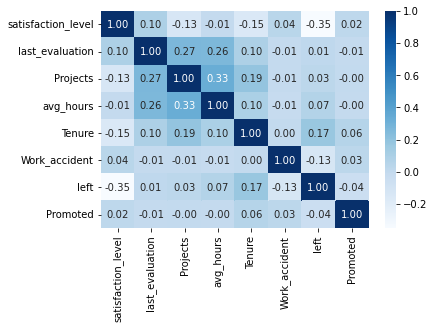

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

### Insights From Step 2

Employees with low salary were the people who left more, while there were more employees who doesn't left and stayed in the company.
Promotion percentage was very low eventhough most of the employees who left are not promoted.
Employees whose satisfaction level is low were the employees who left more.
Employees who left are more from sales department.
Employees whose average monthly hours are high and whose tenure(number of years worked with the company) is between 2-6 years.
Number of persons left and satisfaction, Promoted have negative relationship whereas number of persons left and project, average hours, tenure have positive relationship.

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The data is a classification model, that is a binary type. In present project the person left is an outcome variable where person left is coded as 1 and person stayed is coded as 0.

### Identify the types of models most appropriate for this task.

There are various classification models like logistic regression, decision tree and random forest and ensemble models for these types of projects.

### Modeling



Feature Selection:
The target variable is Left and independent variables are tenure, projects, average hours, salary, last_evaluation, promoted

To perform logistic regression the categorical data should be in the form of numerically encoded. We have to convert those categorical data to numeric. Salary is categorical which is ordinal. So we have to encode that feature.

In [ ]:
df['salary'] = (df['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes)
df = df.drop(['Work_accident','Department'], axis=1)
df.head()

,satisfaction_level,last_evaluation,Projects,avg_hours,Tenure,left,Promoted,salary
0,0.38,0.53,2,157,3,1,0,0
1,0.80,0.86,5,262,6,1,0,1
2,0.11,0.88,7,272,4,1,0,1
3,0.72,0.87,5,223,5,1,0,0
4,0.37,0.52,2,159,3,1,0,0


In [ ]:

mask = (df['Tenure'] <= upp_lmt) & (df['Tenure'] >= lwr_lmt)
df[mask]
y = df['left']
X = df.drop('left', axis=1)

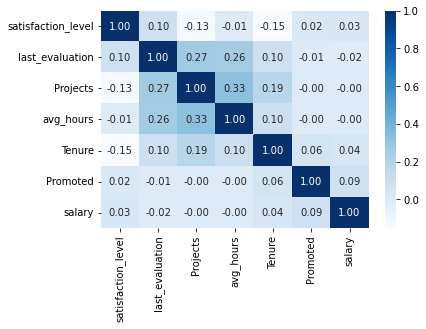

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='Blues', fmt='.2f')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif=pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i).round(1) for i in range(X.shape[1])]
    return(vif)
calc_vif(X)

,variables,VIF
0,satisfaction_level,6.7
1,last_evaluation,18.8
2,Projects,13.5
3,avg_hours,17.9
4,Tenure,7.1
5,Promoted,1.0
6,salary,1.9


In [ ]:
calc_vif(X.drop('last_evaluation', axis=1))

,variables,VIF
0,satisfaction_level,5.9
1,Projects,12.1
2,avg_hours,15.3
3,Tenure,6.8
4,Promoted,1.0
5,salary,1.9


In [ ]:
calc_vif(X.drop(['avg_hours','last_evaluation'], axis=1))

,variables,VIF
0,satisfaction_level,4.8
1,Projects,7.7
2,Tenure,6.3
3,Promoted,1.0
4,salary,1.9


As we can observe from above VIF tables, with all the selected independent variables the multi-collinearity is very high. After removing avg_hours and last_evaluation the variables, then themulticollinearity between the variables got reduced. So we have to work on those two features as those factors are important in our model.

In [ ]:
X['Overwork'] = (X['avg_hours'] > 176 ).astype(int)
X = X.drop(['avg_hours'], axis=1)
X['Emp_Perm_Satsfd'] = (X['last_evaluation'] >= 0.56).astype(int)
X = X.drop(['last_evaluation','Projects'], axis=1)

As number of projects and tenure are interrelated, as number of years worked are more then number of projects will also be more.

In [ ]:
calc_vif(X)

,variables,VIF
0,satisfaction_level,5.0
1,Tenure,4.6
2,Promoted,1.0
3,salary,1.9
4,Overwork,2.8
5,Emp_Perm_Satsfd,4.4


In [ ]:
X.shape[0]

11991

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
LR = LogisticRegression()
Model = LR.fit(X_train,y_train)
y_pred = Model.predict(X_test)
Prediction = pd.DataFrame({'Actual':y_test, 'predicted':y_pred})
Prediction

,Actual,predicted
397,1,1
3107,0,0
9331,0,0
357,1,0
1326,1,1
...,...,...
7337,0,0
376,1,0
2467,0,0
6014,0,0


✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [ ]:
target_predictions = ['Predicted will not leave', 'Predicted will leave']
print(classification_report(y_test, y_pred, target_names=target_predictions))

                          precision    recall  f1-score   support

Predicted will not leave       0.85      0.97      0.90      2501
    Predicted will leave       0.44      0.13      0.21       497

                accuracy                           0.83      2998
               macro avg       0.65      0.55      0.56      2998
            weighted avg       0.78      0.83      0.79      2998



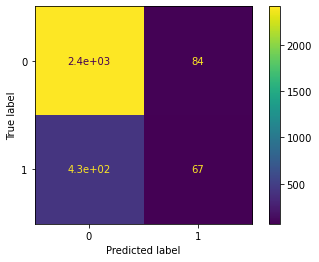

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()

True negatives are more that is actually the employee was not left and predicted also not left.

True positives are 67 which means actually employees left and predicted also left.

False positives are 84 which means actually person not left but predicted as left

False Negatives are nearly 400 which represents employee left but predicted as employee stayed.

Logistic Regression model performance score is 79%, which is actually a good score.

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
Model2 = RF.fit(X_train,y_train)
y_pred2 = Model2.predict(X_test)
Prediction = pd.DataFrame({'Actual':y_test, 'predicted':y_pred2})
Prediction


,Actual,predicted
397,1,1
3107,0,0
9331,0,0
357,1,1
1326,1,1
...,...,...
7337,0,0
376,1,0
2467,0,0
6014,0,0


In [ ]:
target_predictions = ['Predicted will not leave', 'Predicted will leave']
print(classification_report(y_test, y_pred2, target_names=target_predictions))

                          precision    recall  f1-score   support

Predicted will not leave       0.98      0.98      0.98      2501
    Predicted will leave       0.89      0.88      0.88       497

                accuracy                           0.96      2998
               macro avg       0.93      0.93      0.93      2998
            weighted avg       0.96      0.96      0.96      2998



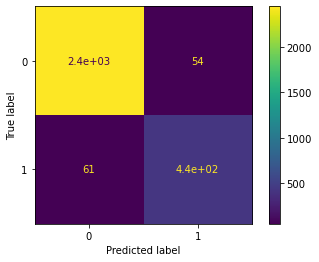

In [ ]:
cm = confusion_matrix(y_test, y_pred2, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




True negatives are more that is actually the employee was not left and predicted also not left.

True positives are less than or nearly to 500 which means actually employees left and predicted also left.

False positives are 54 which means actually person not left but predicted as left

False Negatives are 61 which represents employee left but predicted as employee stayed.

Random Forest Model's Accuracy & f1-score is 96% which is a good score compared to Logistic Regression whose model performance is 79%.  

In [ ]:
test_df = pd.DataFrame({'True': y_test, 'Logistic': y_pred, 'RandomForest': y_pred2})

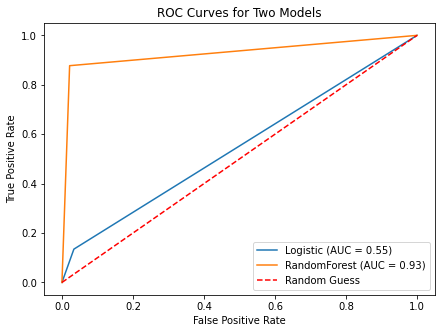

In [ ]:
from sklearn.metrics import auc, roc_curve
plt.figure(figsize=(7, 5))

for models in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(y_test, test_df[models])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{models} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

**Feature Importance**

In [ ]:
importances = pd.DataFrame(Model2.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
importances = importances.sort_values(by='gini_importance', ascending=False)
importances


,gini_importance
satisfaction_level,0.598212
Tenure,0.275305
Overwork,0.064857
Emp_Perm_Satsfd,0.041843
salary,0.017457
Promoted,0.002327


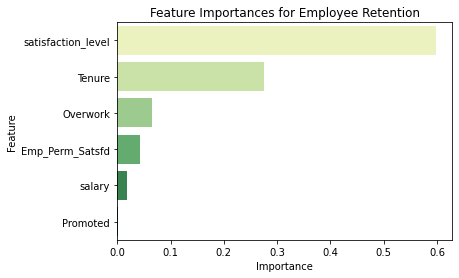

In [ ]:
sns.barplot(data=importances, x="gini_importance", y=importances.index, orient='h', palette='YlGn')
plt.title("Feature Importances for Employee Retention", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

Double-click to enter your responses here.

### Summary of model results

Random Forest Model's Accuracy & f1-score is 96% which is a good score compared to Logistic Regression whose model performance is 79%.

### Conclusion, Recommendations

Employee satisfaction, number of years worked and overtime work are the factors mainly effecting the employee's retention.
So, they have to still conduct a survey on particularly satisfaction, like which factors makes them to leave the company like salary hike, overtime, promotions.
And most of the employees left are the persons who worked between 2-6 years. So, the company have to grant salary hike and additional benefits for those employees who worked for more than 2 years. And promotions for those who worked for more than 4 years.
Overworked employees should get more pay.